## Introduction (< 0.5 page)

Provide a brief introduction to the model that you are evaluating, and the test dataset that you are using, and the context of use of the model.


## Model Performance (< 0.5 page)

Provide the accuracy and confusion matrix of the model on the test dataset and a brief discussion on the performance of the model.

In [2]:
# Install a pip package in the current Jupyter kernel

import pandas as pd
import joblib
from pydantic import BaseModel, Field
from pydantic.tools import parse_obj_as

test_dataset = pd.read_csv("https://cmu-313.github.io/assets/project/student_data.csv")
clf = joblib.load('./model.pkl')

feature_cols = ['Student ID', 'Gender', 'Age', 'Major', 'GPA', 'Extra Curricular',
       'Num Programming Languages', 'Num Past Internships']
y_pred = clf.predict(test_dataset[feature_cols])
y_pred = pd.Series(y_pred)
y = test_dataset['Good Candidate']


print(f"Test accuracy is {(y==y_pred).sum()/y.size:.4f}")

Test accuracy is 0.8320


Matplotlib created a temporary config/cache directory at /var/folders/c7/r0nx2srx14x1wcqf_7w83jvm0000gq/T/matplotlib-mownoify because the default path (/Users/chen/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


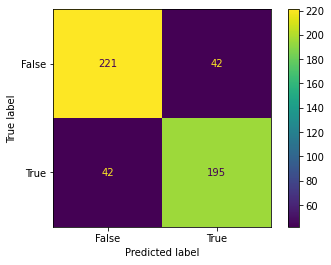

In [3]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()

The model has a test accuracy of 0.8320, which means it correctly predicted the class labels for 83.20% of the test instances. However, the confusion matrix indicates that the model correctly classified 221 instances as class 0 and 195 instances as class 1. However, it incorrectly classified 42 instances of class 1 as class 0 (false negatives) and 42 instances of class 0 as class 1 (false positives).

## Description of the test data (< 1 page)

Provide descriptive statistics of the test dataset (e.g. mean, median, mode, standard deviation, etc.) for each feature, preferably in a table. You should also provide a brief discussion on the distribution of the features.


In [4]:
test_dataset.describe()

,Student ID,Age,GPA,Num Programming Languages,Num Past Internships,Good Candidate
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,249.500000,20.944000,2.905780,3.04600,2.052000,0.474000
std,144.481833,1.455025,0.839559,1.36073,1.407572,0.499824
min,0.000000,18.000000,0.000000,1.00000,0.000000,0.000000
25%,124.750000,20.000000,2.345000,2.00000,1.000000,0.000000
50%,249.500000,21.000000,2.990000,3.00000,2.000000,0.000000
75%,374.250000,22.000000,3.560000,4.00000,3.000000,1.000000
max,499.000000,25.000000,4.000000,5.00000,4.000000,1.000000


In [14]:
from statistics import mode
print("Mode of age is % s" % (mode(test_dataset['Age'])))
print("Mode of GPA is % s" % (mode(test_dataset['GPA'])))
print("Mode of Num Programming Languages is % s" % (mode(test_dataset['Num Programming Languages'])))
print("Mode of Num Past Internships is % s" % (mode(test_dataset['Num Past Internships'])))


Mode of age is 21
Mode of GPA is 4.0
Mode of Num Programming Languages is 3
Mode of Num Past Internships is 2


### Discussion on the distribution of the features:

**Student ID**: This is a unique identifier for each student in the dataset, ranging from 0 to 499.

**Age**: This is a continuous variable representing the age of each student in years. The mean age is 20.944, with a standard deviation of 1.455. The minimum age in the dataset is 18, and the maximum age is 25. The median age is 21, and the mode is 21.

**GPA**: This is a continuous variable representing the grade point average for each student. The mean GPA is 2.906, with a standard deviation of 0.840. The minimum GPA is 0, and the maximum GPA is 4. The median GPA is 2.99, and the mode is 4.0.

**Num Programming Languages**: This is a discrete variable representing the number of programming languages that each student can use. The mean value is 3.046, with a standard deviation of 1.361. The minimum value is 1, and the maximum value is 5. The median value is 3, and the mode is 3.

**Num Past Internships**: This is a discrete variable representing the number of past internships that each student has completed. The mean value is 2.052, with a standard deviation of 1.408. The minimum value is 0, and the maximum value is 4. The median value is 2, and the mode is 2.

**Good Candidate**: This is a binary variable indicating whether or not each student is considered a good candidate for a job. The mean value is 0.474, indicating that slightly less than half of the students in the dataset are considered good candidates(labeled 1).

**Major**: This is a categorical variable indicating the major of each student, it has values such as Math, Computer Science, Electrical and Computer Engineering, Business, Information Systems, and Statistics and Machine Learning. The major with most students is Math.

**Extra Curricular**: This is a categorical variable indicating the extra curricular organizations, it has values such as Sorority, Fraternity, Teaching Assistant, Sports and academic clubs. The extracurricular activity with most students is Student Theatre.

## Feature Exploration (< 1 page)
Identify features that you think are important when it comes to evaluating the fairness of the model, and explain why.


## Fairness Evaluation (~ 1.5 page)

Consider three fairness strategies that were discussed in class and then:
- Provide the corresponding fairness metrics for the model (if applicable) based on the features you selected in step 4.
- Determine whether the model is fair under each fairness strategy, and provide a brief discussion on why.
- Determine which fairness strategy is the most appropriate for the model, given the context of what the model is used for. Provide a brief discussion on why.

## Recommendation (< 0.5 page)
Make a recommendation on whether the model should be used in production, and provide a brief discussion on why.
